In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
lap=pd.read_csv('/content/laptop_cleaned.csv')

In [3]:
lap.head(3)

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_INR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,29879.17,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,67894.00,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,58017.00,Ryzen


In [4]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1431 non-null   object 
 1   Brand         1431 non-null   object 
 2   Screen_Size   1431 non-null   float64
 3   Rating        1431 non-null   float64
 4   Price         1431 non-null   object 
 5   Ram(Gb)       1431 non-null   int64  
 6   Disk_Size_GB  1431 non-null   float64
 7   Price_INR     1431 non-null   float64
 8   Cpu_Type      1431 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 100.7+ KB


In [5]:
lap.describe()

,Screen_Size,Rating,Ram(Gb),Disk_Size_GB,Price_INR
count,1431.000000,1431.000000,1431.000000,1.431000e+03,1431.000000
mean,15.077358,3.727184,15.192872,1.313544e+03,83606.328630
std,3.085788,1.518375,14.540726,2.706010e+04,78732.638889
min,10.100000,0.000000,1.000000,1.000000e-02,3235.340000
25%,14.000000,3.900000,8.000000,1.280000e+02,29879.170000
50%,15.600000,4.300000,12.000000,5.120000e+02,55609.170000
75%,15.600000,4.500000,16.000000,1.024000e+03,111344.915000
max,116.000000,5.000000,128.000000,1.024000e+06,547717.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f45e7310dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45e7311300>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45e7310b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45e7311840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45e7311ae0>],
 'means': []}

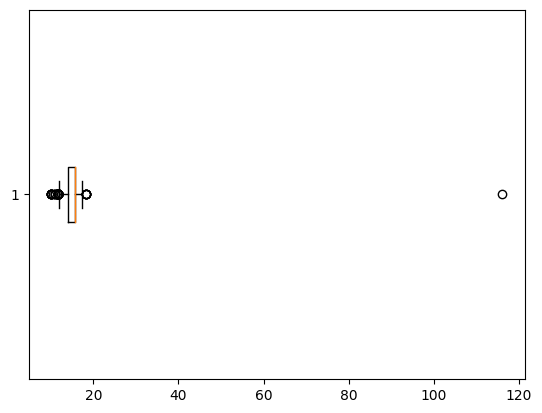

In [6]:
plt.boxplot(lap['Screen_Size'],vert=False)

In [7]:
Q1 = lap['Screen_Size'].quantile(0.25)
Q3 = lap['Screen_Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = lap[(lap['Screen_Size'] > upper_bound)]
print(outliers)


                                                  Title      Brand  \
606   Alienware 18 ALW18-7502sLV 18-Inch Laptop (Sil...       Dell   
630   Alienware ALW18-7501sLV 18.4-Inch Laptop (2.5 ...  Alienware   
636   Alienware ALW18-3005sLV 18.4-Inch Laptop (2.4 ...  Alienware   
638   Alienware ALW18-4001sLV 18.4-Inch Laptop (2.5 ...  Alienware   
652   Alienware ALW18-7501sLV 18.4-Inch Laptop (2.5 ...  Alienware   
672   Alienware ALW18-7500sLV 18.4-Inch Laptop (2.4 ...  Alienware   
1155  SAMSUNG Chromebook 3 11.6-inch HD WLED Intel C...    SAMSUNG   

      Screen_Size  Rating      Price  Ram(Gb)  Disk_Size_GB  Price_INR  \
606          18.4     4.4  $1,999.81        8        1024.0  165984.23   
630          18.4     2.9  $1,999.81        8        1024.0  165984.23   
636          18.4     5.0  $1,999.00        8        1024.0  165917.00   
638          18.4     3.5  $1,999.95       16        1024.0  165995.85   
652          18.4     2.9  $1,999.81        8        1024.0  165984.2

In [8]:
lap.drop([606,630,636,638,652,672,1155],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45e4606980>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45e4606da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45e46066e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45e46072e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45e4607580>],
 'means': []}

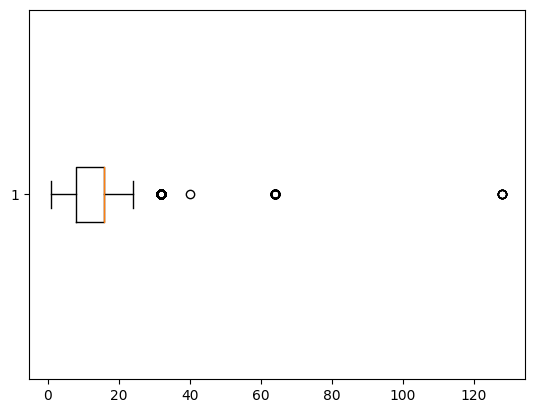

In [13]:
plt.boxplot(lap['Ram(Gb)'],vert=False)

there is 215 column so we will not remove all column we will remove above 60 gb ram.(size=52)

In [15]:
Q1 = lap['Ram(Gb)'].quantile(0.25)
Q3 = lap['Ram(Gb)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = lap[(lap['Ram(Gb)'] > 60)]
print(outliers)
outliers.shape

                                                  Title        Brand  \
3     MSI Latest GE76 Raider Gaming Laptop | 17.3" 1...          MSI   
6     EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...  EXCaliberPC   
12    2022 MSI Raider GE66 12UHS-235 Pro Extreme (i9...  EXCaliberPC   
14    2022 MSI Creator Z17 A12UHT-048 Pro Extreme (i...  EXCaliberPC   
15    2022 MSI CreatorPro M16 A12UJS-458 (i7-12700H,...  EXCaliberPC   
26    GS66 Stealth Pro Extreme by_MSI Gaming Laptop ...  EXCaliberPC   
40    EXCaliberPC 2022 MSI Katana GF66 12UGSOK-1046 ...  EXCaliberPC   
42    MSI 2022 GE76 Raider 17.3" 144 Hz FHD Gaming L...          MSI   
47    2022 MSI GF65 Thin 15.6" FHD 144Hz Gaming Lapt...          MSI   
68    2022 MSI Stealth GS77 12UHS-040 Pro Extreme (i...  EXCaliberPC   
71    2022 MSI GF65 Thin 15.6" FHD IPS 144Hz Gaming ...          MSI   
77    2022 MSI CreatorPro X17 A12UKS-059 (i9-12900HX...  EXCaliberPC   
88    2022 MSI CreatorPro M16 A12UJS-458 (i7-12700H,...  EXCalib

(52, 9)

In [16]:
condition = lap['Ram(Gb)']>60
lap=lap[~condition]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45e523a470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45e5238ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45e52392a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45e4463d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45e4462290>],
 'means': []}

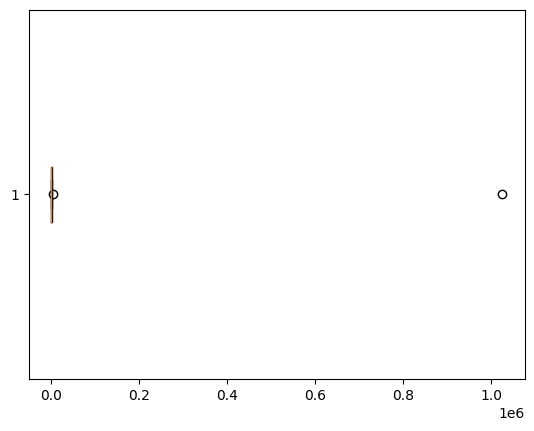

In [20]:
plt.boxplot(lap['Disk_Size_GB'],vert=False)

In [22]:
Q1 = lap['Disk_Size_GB'].quantile(0.25)
Q3 = lap['Disk_Size_GB'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = lap[(lap['Disk_Size_GB'] < lower_bound) | (lap['Disk_Size_GB'] > upper_bound)]
print(outliers)

                                                 Title        Brand  \
8    2022 MSI Titan GT77 12UGS-009 (i7-12800HX, 32G...  EXCaliberPC   
101  MSI GF63 Thin 9SC-066 15.6" Gaming Laptop, Thi...          MSI   

     Screen_Size  Rating      Price  Ram(Gb)  Disk_Size_GB  Price_INR Cpu_Type  
8           17.3     5.0  $3,295.00       32        4096.0   273485.0       i7  
101         15.6     4.5    $949.00       16     1024000.0    78767.0       i7  


In [23]:
lap.drop([8,101],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45e4099030>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45e409b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45e4099bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45e3e603a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45e3e61540>],
 'means': []}

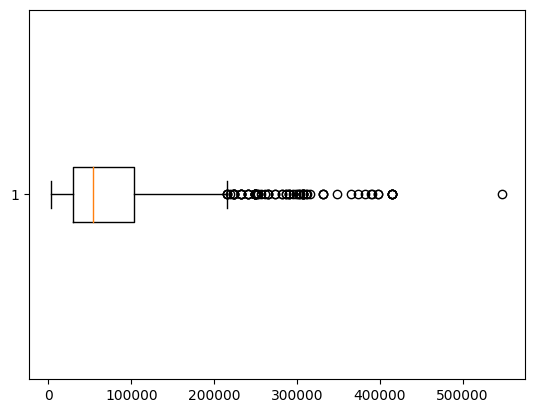

In [25]:
plt.boxplot(lap['Price_INR'],vert=False)

In [26]:
Q1 = lap['Price_INR'].quantile(0.25)
Q3 = lap['Price_INR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = lap[(lap['Price_INR'] > upper_bound)]
print(outliers)

                                                  Title  Brand  Screen_Size  \
30    Apple 2021 MacBook Pro (16-inch, M1 Pro chip w...  Apple         16.2   
35    MSI Creator Z16 16" QHD+ 120hz 100% DCI-P3 Pre...    MSI         16.0   
60    MSI Creator 15 A10SGS-040 15.6" 4K Ultra HD VR...    MSI         15.6   
62    MSI GS66 Stealth Gaming Laptop: 15.6" 300Hz FH...    MSI         15.6   
73    MSI Vector GP76 17.3" FHD 360Hz Gaming Laptop:...    MSI         17.3   
...                                                 ...    ...          ...   
1070  Dell Precision 7770 Mobile Workstation - 17.3"...   Dell         17.3   
1125  ASUS ROG Zephyrus Duo 16 Gaming Laptop, 16” 16...   ASUS         16.0   
1131  ASUS G532LWS-XS96 15.6 inch Intel Core i9-1098...   ASUS         15.6   
1210  ASUS ZenBook Pro Duo 15 OLED UX582 Laptop, 15....   ASUS         15.6   
1241  Dell XPS 17 9720 Laptop17.0-inch UHD+ (3840 x ...   Dell         17.0   

      Rating      Price  Ram(Gb)  Disk_Size_GB  Pri

In [30]:
condition=lap['Price_INR'] >250000
lap=lap[~condition]

In [31]:
lap.shape

(1321, 9)

In [32]:
lap.describe()

,Screen_Size,Rating,Ram(Gb),Disk_Size_GB,Price_INR
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,14.938191,3.812263,12.793338,527.726730,68837.591877
std,1.493107,1.433612,8.313579,436.981252,52668.078243
min,10.100000,0.000000,2.000000,0.010000,3235.340000
25%,14.000000,4.000000,8.000000,128.000000,28145.300000
50%,15.600000,4.300000,8.000000,512.000000,52289.170000
75%,15.600000,4.500000,16.000000,1024.000000,96359.680000
max,17.300000,5.000000,40.000000,2048.000000,248999.170000


->first we will do univariate analysis of each attribute.:😌

In [33]:
lap.head(3)

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_INR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,29879.17,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,67894.00,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,58017.00,Ryzen


Text(0.5, 1.0, 'brand_distribution')

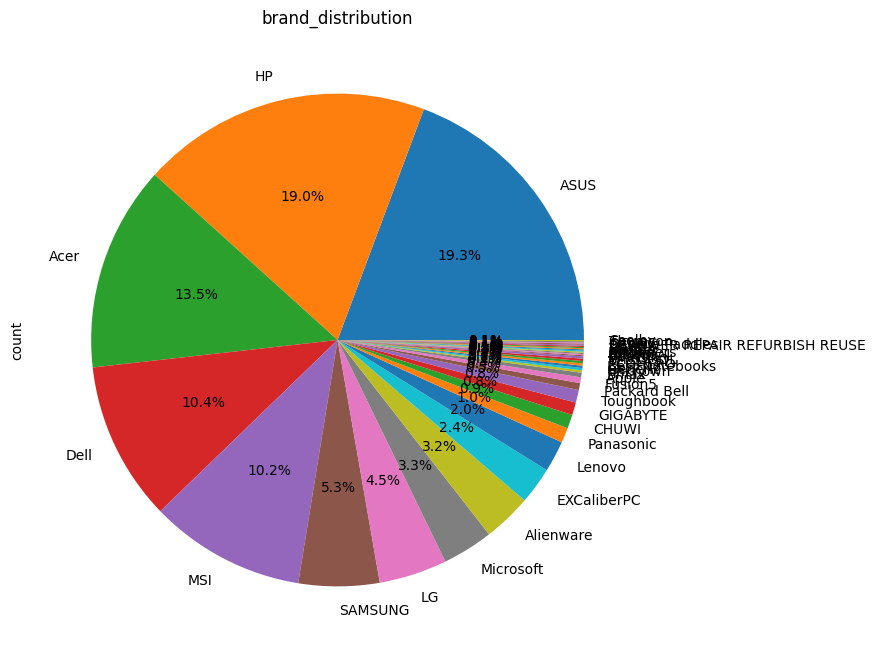

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))  # Change the size of the figure here
lap['Brand'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('brand_distribution')

<Axes: xlabel='Brand'>

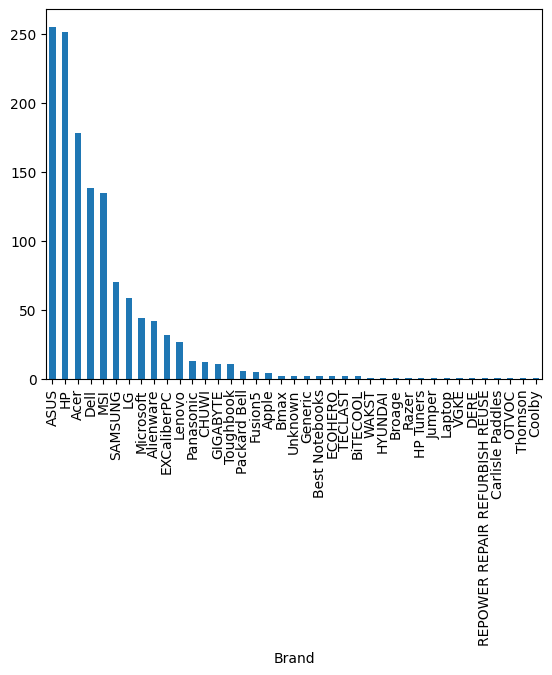

In [43]:
lap['Brand'].value_counts().plot(kind='bar')

In [103]:
rating_counts = lap.Rating.value_counts().sort_index(ascending=False)

In [104]:
rating_dict = {
    "5": rating_counts[rating_counts.index == 5].sum(),
    "4 to 5":  rating_counts[(rating_counts.index < 5) & (rating_counts.index >= 4)].sum(),
    "3 to 4":  rating_counts[(rating_counts.index < 4) & (rating_counts.index >= 3)].sum(),
    "2 to 3":  rating_counts[(rating_counts.index < 3) & (rating_counts.index >= 2)].sum(),
    "1 to 2":  rating_counts[(rating_counts.index < 2) & (rating_counts.index >= 1)].sum(),
    "0 to 1":  rating_counts[(rating_counts.index < 1) & (rating_counts.index >= 0)].sum()
}
rating_dict

{'5': 114,
 '4 to 5': 896,
 '3 to 4': 143,
 '2 to 3': 16,
 '1 to 2': 3,
 '0 to 1': 149}

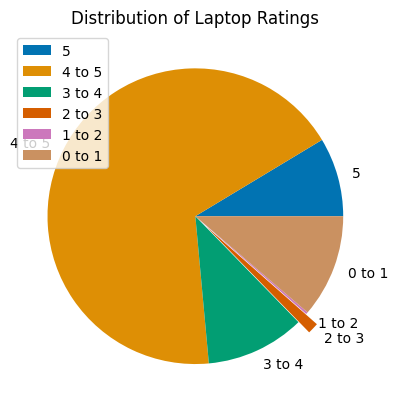

In [105]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')
# plotting data on chart
explode = [0,0,0,0.1,0,0]
plt.pie(rating_dict.values(), labels=rating_dict.keys(), colors=palette_color,explode=explode)
plt.title("Distribution of Laptop Ratings")
plt.legend()
plt.show()

<BarContainer object of 6 artists>

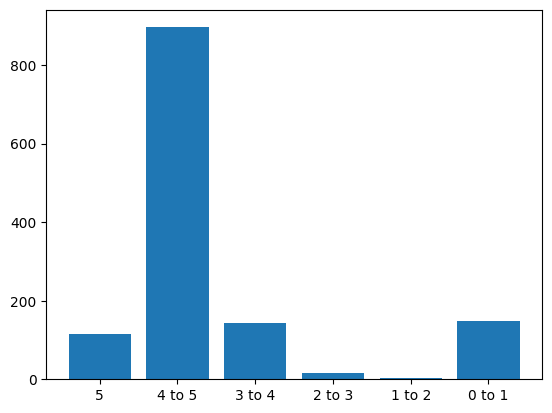

In [106]:
names = list(rating_dict.keys())
values = list(rating_dict.values())

plt.bar(range(len(rating_dict)), values, tick_label=names)

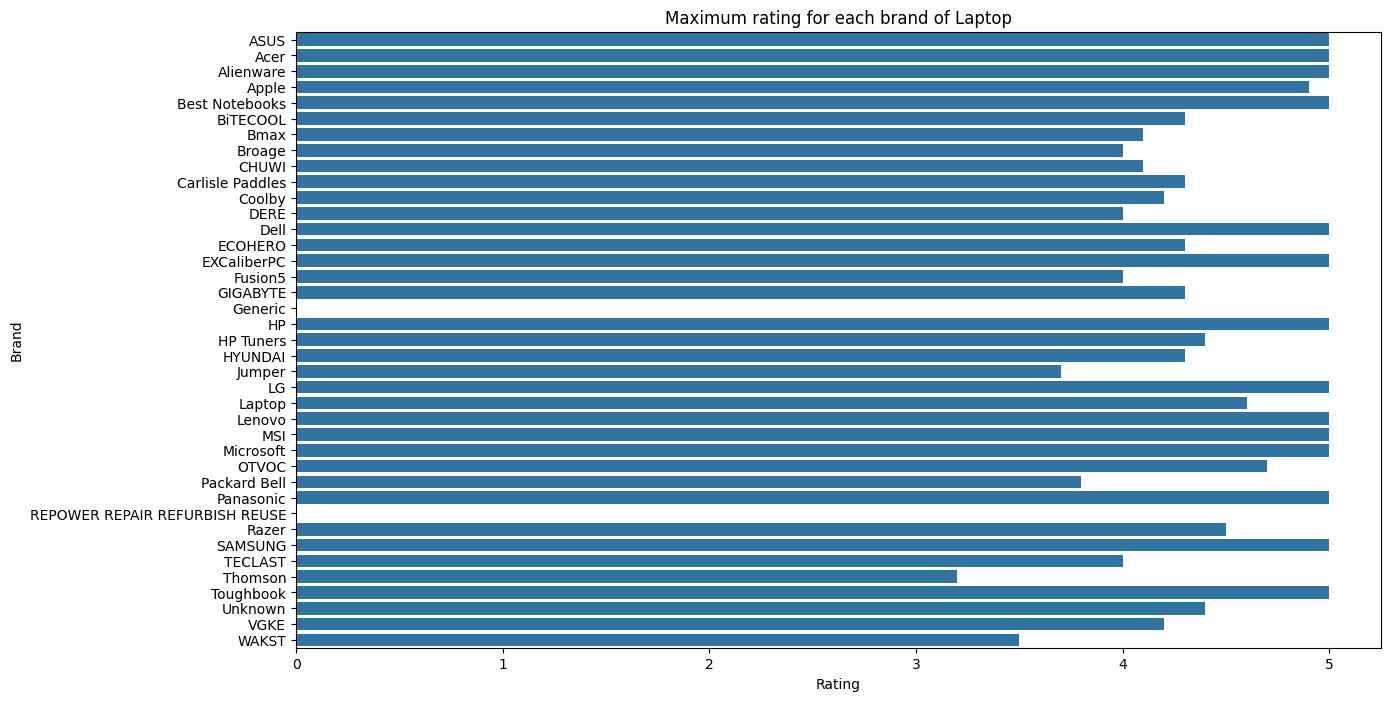

In [108]:
plt.figure(figsize=(14, 8))
grouped_brands = lap.groupby("Brand").max()
sns.barplot(y=grouped_brands.index,x=grouped_brands.Rating, orient='h')
plt.title("Maximum rating for each brand of Laptop")
plt.show()

<Axes: xlabel='Ram(Gb)'>

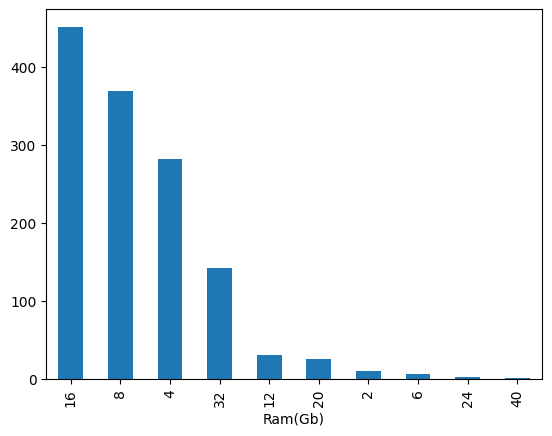

In [51]:
lap['Ram(Gb)'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Disk_Size_GB_distribution')

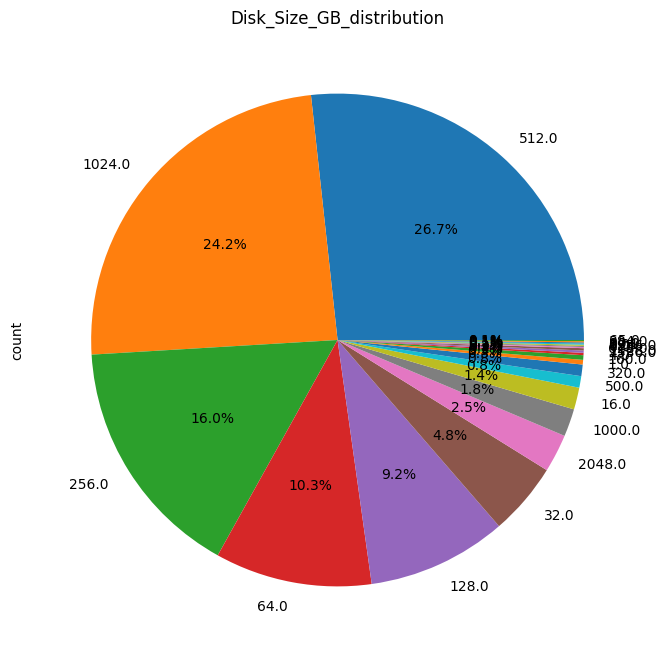

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))  # Change the size of the figure here
lap['Disk_Size_GB'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Disk_Size_GB_distribution')

<Axes: xlabel='Disk_Size_GB'>

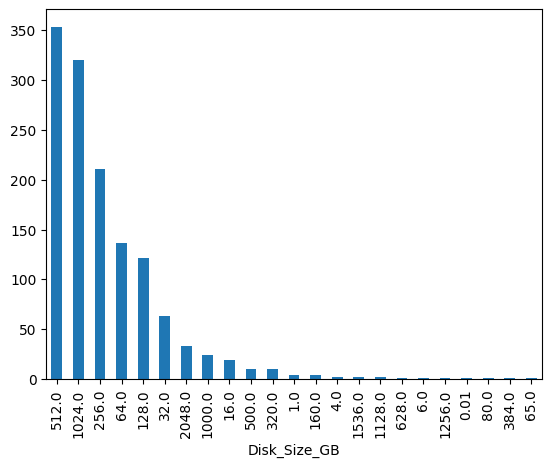

In [53]:
lap['Disk_Size_GB'].value_counts().plot(kind='bar')

In [65]:
lap.head(3)

,Title,Brand,Screen_Size,Rating,Price,Ram(Gb),Disk_Size_GB,Price_INR,Cpu_Type
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,3.9,$359.99,4,256.0,29879.17,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,4.3,$818.00,16,256.0,67894.00,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,4.5,$699.00,16,512.0,58017.00,Ryzen


->now time for bivaraite analysis.👍🏻

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        

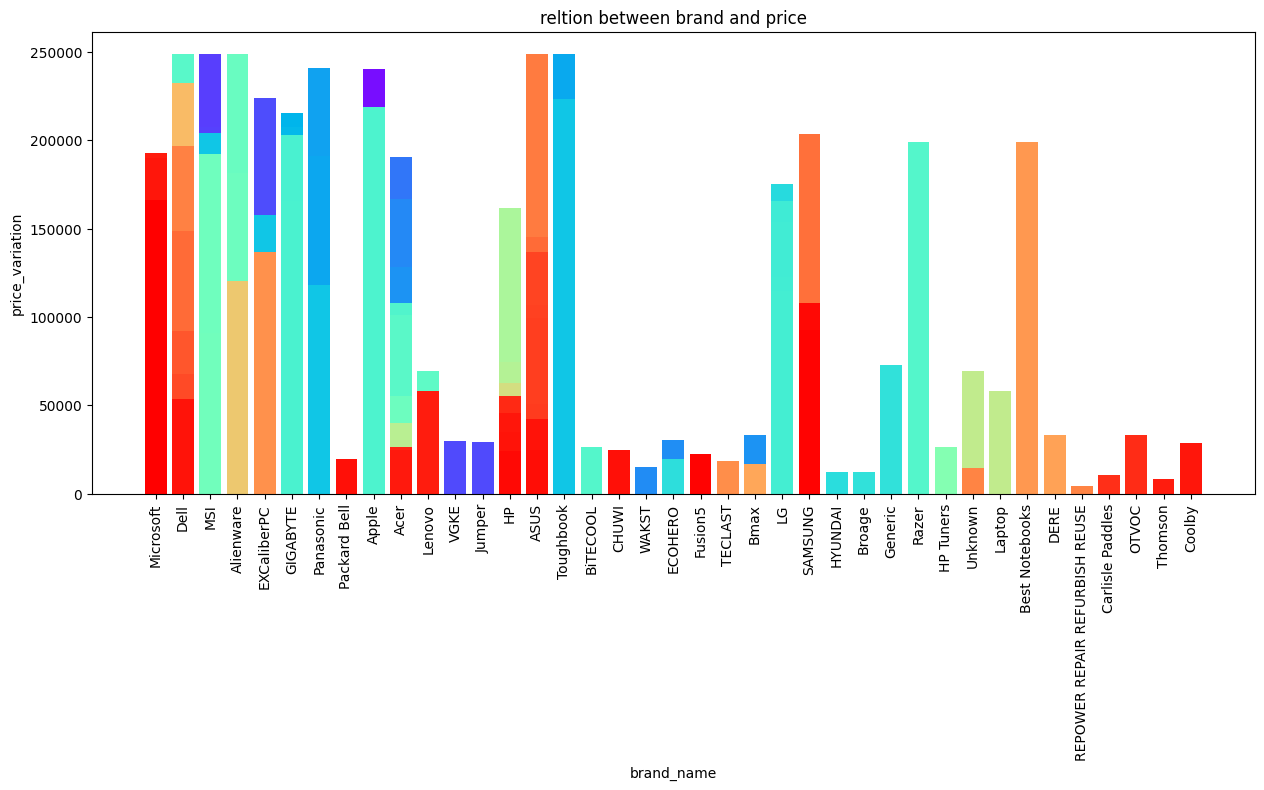

In [93]:
plt.figure(figsize=(15, 6))
colors = np.linspace(0, 1, len(lap['Brand']))
plt.bar(lap['Brand'],lap['Price_INR'],color=plt.get_cmap('rainbow')(colors))
plt.xticks(rotation=90)

plt.xlabel('brand_name')
plt.ylabel('price_variation')
plt.title('reltion between brand and price')
plt.show()

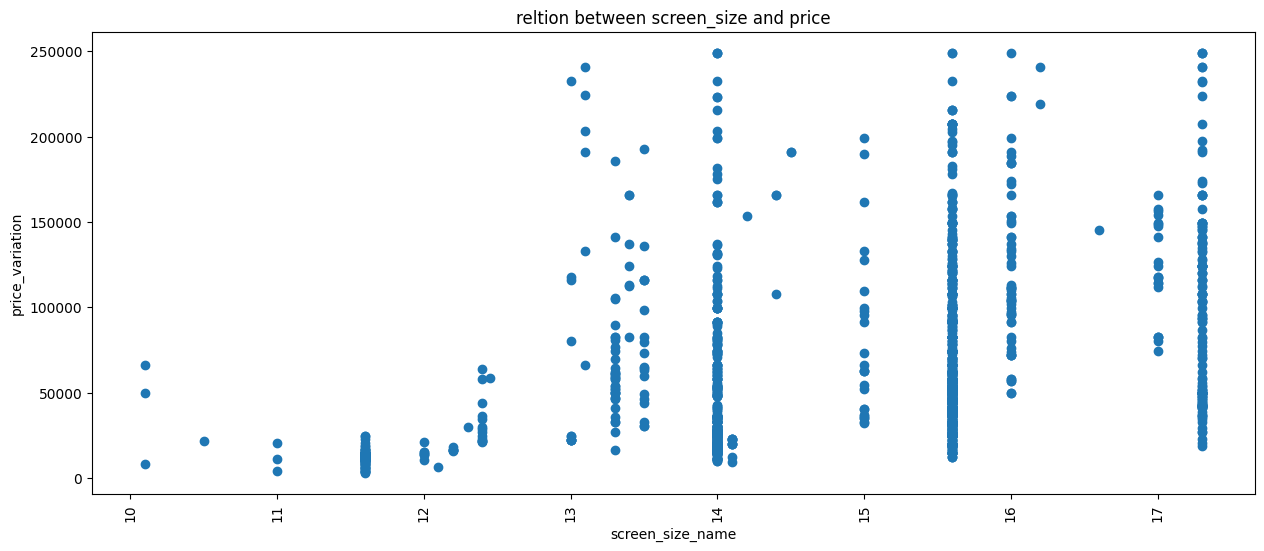

In [66]:
plt.figure(figsize=(15, 6))
plt.scatter(lap['Screen_Size'],lap['Price_INR'])
plt.xticks(rotation=90)

plt.xlabel('screen_size_name')
plt.ylabel('price_variation')
plt.title('reltion between screen_size and price')
plt.show()

In [83]:
correlation = lap['Screen_Size'].corr(lap['Price_INR'])
correlation

0.3813593740618024

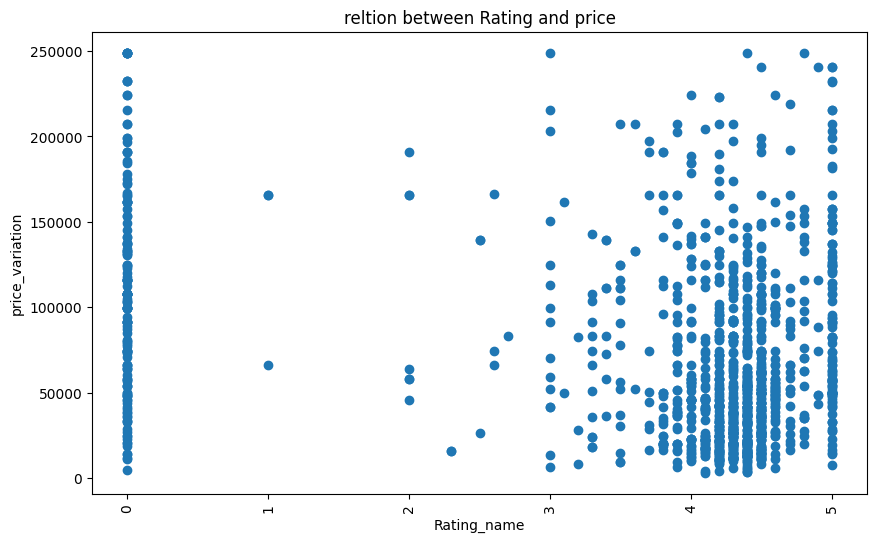

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(lap['Rating'],lap['Price_INR'])
plt.xticks(rotation=90)

plt.xlabel('Rating_name')
plt.ylabel('price_variation')
plt.title('reltion between Rating and price')
plt.show()

✌🏻Interpreting the Correlation Coefficient
Value Range: The Pearson correlation coefficient ranges from -1 to 1.</br>
1: Perfect positive linear relationship.</br>
-1: Perfect negative linear relationship.</br>
0: No linear relationship.</br>
0 < r < 1: Positive linear relationship.</br>
-1 < r < 0: Negative linear relationship.</br>

In [84]:
correlation = lap['Rating'].corr(lap['Price_INR'])
correlation

-0.2679930634888768

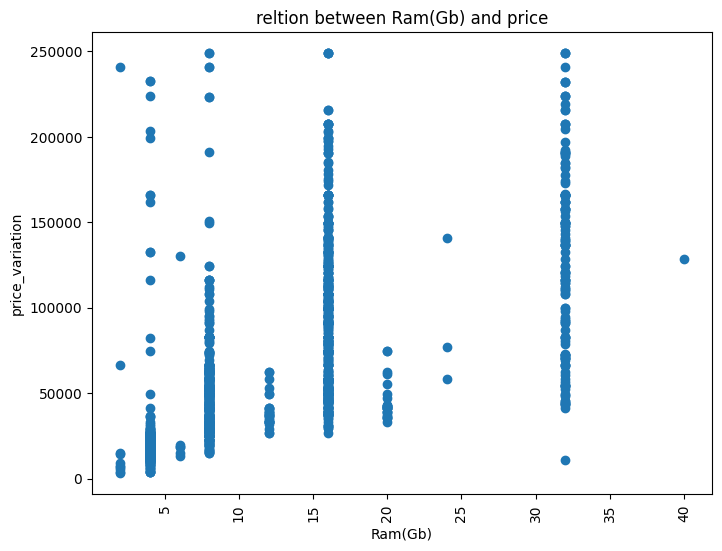

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(lap['Ram(Gb)'],lap['Price_INR'])
plt.xticks(rotation=90)

plt.xlabel('Ram(Gb)')
plt.ylabel('price_variation')
plt.title('reltion between Ram(Gb) and price')
plt.show()

In [87]:
correlation = lap['Ram(Gb)'].corr(lap['Price_INR'])
correlation

0.5907377698639705

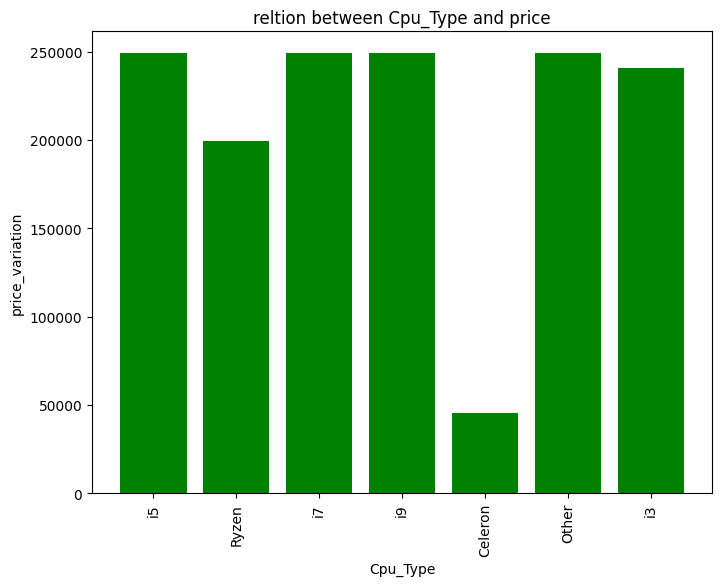

In [78]:
plt.figure(figsize=(8, 6))
plt.bar(lap['Cpu_Type'],lap['Price_INR'],color='green')
plt.xticks(rotation=90)

plt.xlabel('Cpu_Type')
plt.ylabel('price_variation')
plt.title('reltion between Cpu_Type and price')
plt.show()

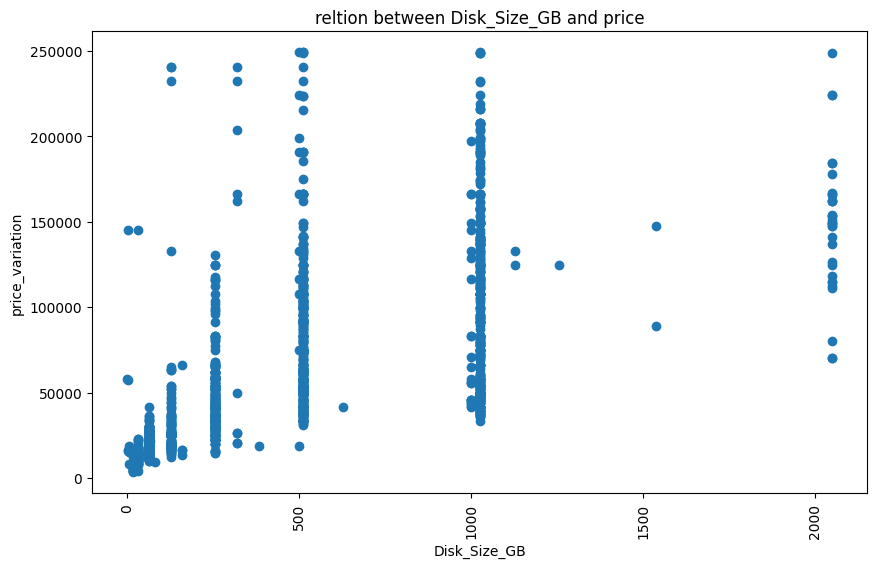

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(lap['Disk_Size_GB'],lap['Price_INR'])
plt.xticks(rotation=90)

plt.xlabel('Disk_Size_GB')
plt.ylabel('price_variation')
plt.title('reltion between Disk_Size_GB and price')
plt.show()

In [89]:
correlation = lap['Disk_Size_GB'].corr(lap['Price_INR'])
correlation

0.6010592439281774

In [97]:
contingency_table = pd.crosstab(lap['Brand'], lap['Ram(Gb)'])
print(contingency_table)

Ram(Gb)                         2   4   6   8   12  16  20  24  32  40
Brand                                                                 
ASUS                             0  79   0  73  11  60  15   0  16   1
Acer                             1  57   0  57   5  31  11   2  14   0
Alienware                        0   0   1   7   0  23   0   0  11   0
Apple                            0   0   0   0   0   2   0   0   2   0
Best Notebooks                   0   0   0   0   0   2   0   0   0   0
BiTECOOL                         0   0   0   0   2   0   0   0   0   0
Bmax                             0   0   0   2   0   0   0   0   0   0
Broage                           0   1   0   0   0   0   0   0   0   0
CHUWI                            0   0   0  12   0   0   0   0   0   0
Carlisle Paddles                 0   1   0   0   0   0   0   0   0   0
Coolby                           0   0   0   1   0   0   0   0   0   0
DERE                             0   0   0   0   1   0   0   0   0   0
Dell  

<Axes: xlabel='Ram(Gb)', ylabel='Brand'>

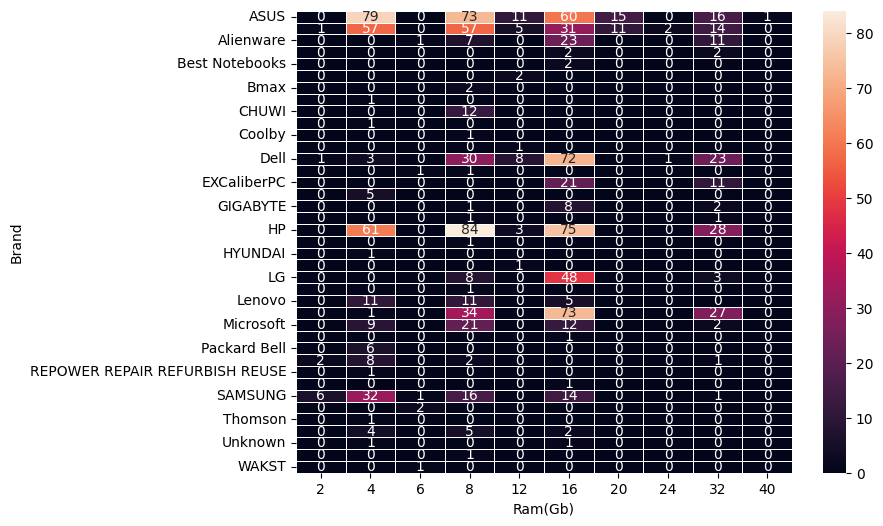

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', linewidths=.5)


In [100]:
contingency_table = pd.crosstab(lap['Brand'], lap['Cpu_Type'])
print(contingency_table)

Cpu_Type                        Celeron  Other  Ryzen  i3  i5  i7  i9
Brand                                                                
ASUS                                 54     25     56  39  34  45   2
Acer                                 31     15     38  30  27  36   1
Alienware                             0      7      0   0   1  34   0
Apple                                 0      4      0   0   0   0   0
Best Notebooks                        0      0      0   0   0   2   0
BiTECOOL                              2      0      0   0   0   0   0
Bmax                                  2      0      0   0   0   0   0
Broage                                1      0      0   0   0   0   0
CHUWI                                12      0      0   0   0   0   0
Carlisle Paddles                      1      0      0   0   0   0   0
Coolby                                1      0      0   0   0   0   0
DERE                                  1      0      0   0   0   0   0
Dell                

<Axes: xlabel='Cpu_Type', ylabel='Brand'>

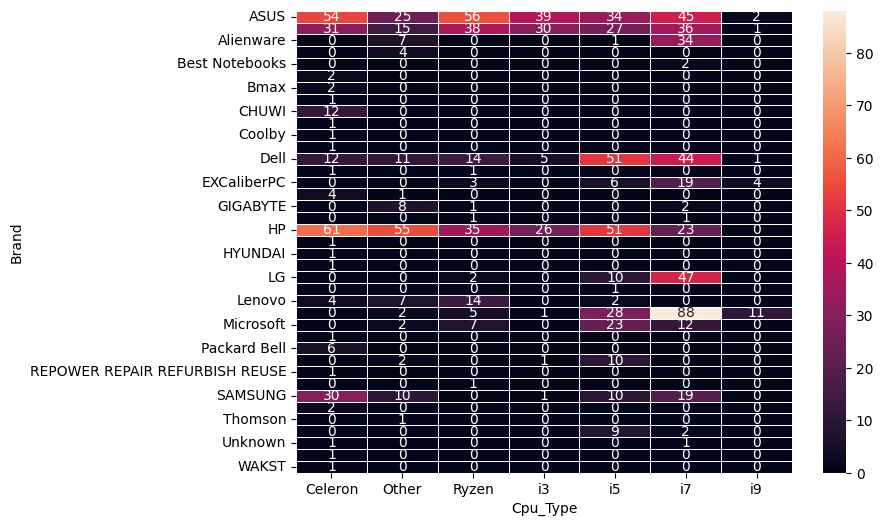

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', linewidths=.5)


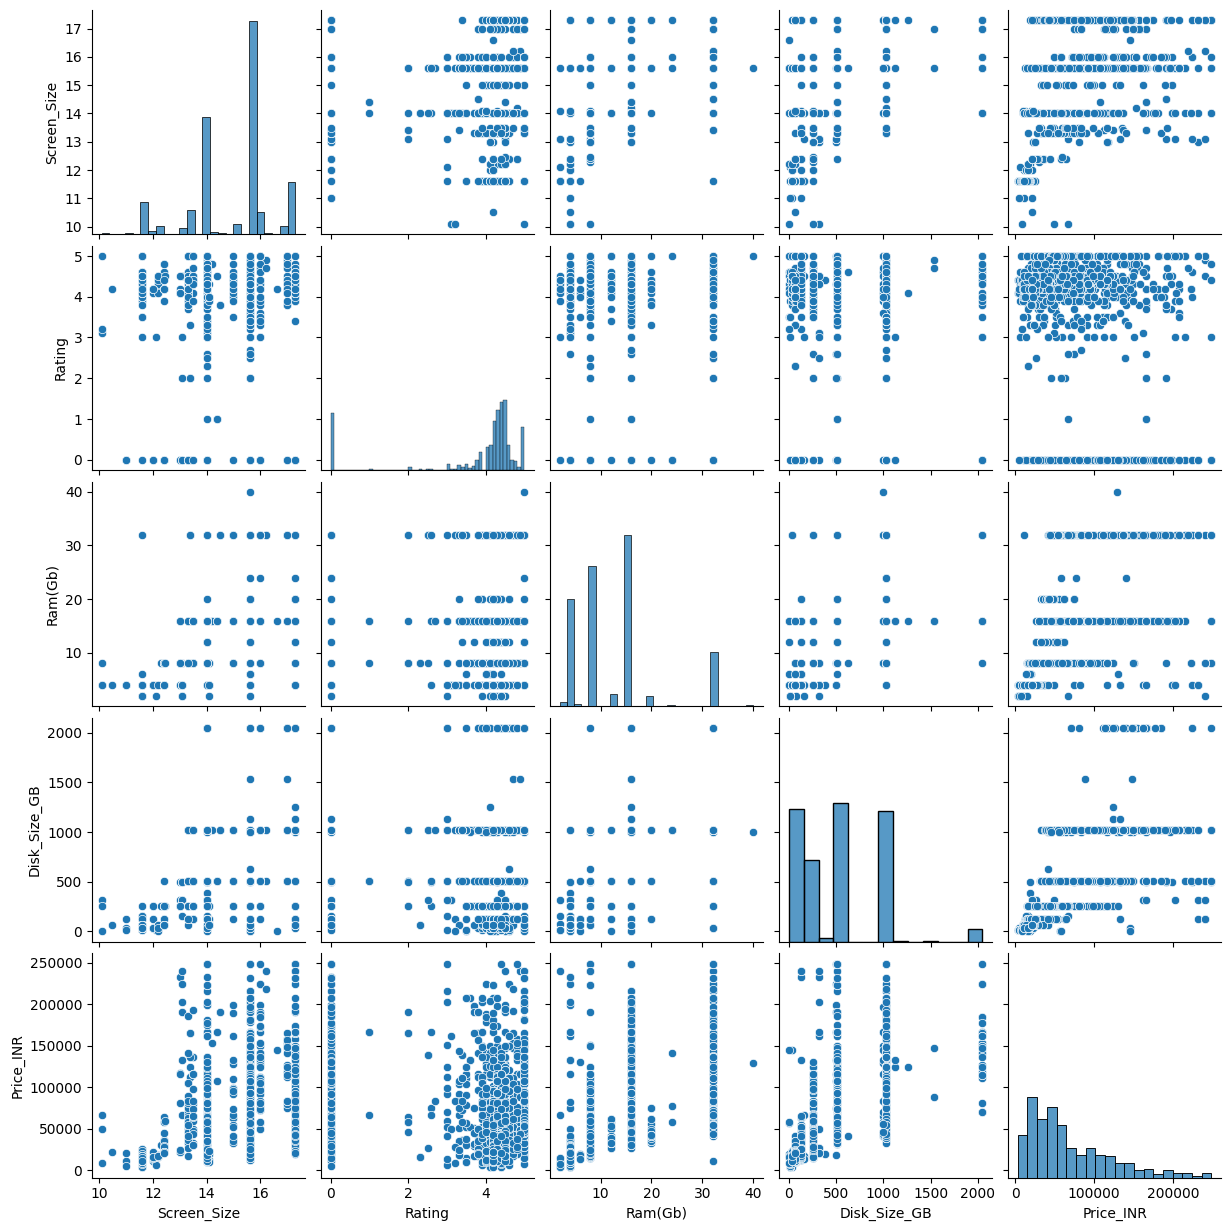

In [90]:
sns.pairplot(lap)